In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
ind_1nn = np.load('/media/wz/7AD631A4D6316195/Projects/mc_pure_qua/fcc_32/ind_1nn.npy')
ind_2nn = np.load('/media/wz/7AD631A4D6316195/Projects/mc_pure_qua/fcc_32/ind_2nn.npy')
ind_3nn = np.load('/media/wz/7AD631A4D6316195/Projects/mc_pure_qua/fcc_32/ind_3nn.npy')
ind_4nn = np.load('/media/wz/7AD631A4D6316195/Projects/mc_pure_qua/fcc_32/ind_4nn.npy')
ind_5nn = np.load('/media/wz/7AD631A4D6316195/Projects/mc_pure_qua/fcc_32/ind_5nn.npy')
ind_6nn = np.load('/media/wz/7AD631A4D6316195/Projects/mc_pure_qua/fcc_32/ind_6nn.npy')

In [193]:
def laplacian_matrix(ind_nNN, epsilon=-1e-7):
    d = np.zeros((32,32))
    a = np.zeros((32,32))
    for i in ind_nNN:
        i1, i2 = i[0], i[1]
        a[i1,i2] += 1
        a[i2,i1] += 1
    
    d = np.zeros_like(a)
    d[range(a.shape[0]), range(a.shape[0])] = np.sum(a, axis=1)

    # Normalized Laplacian
    d_inv = (d+epsilon)**(-1/2)
    d_inv = np.nan_to_num(d_inv)

    l = np.eye(32) + np.dot(d_inv, np.dot(a, d_inv))

    l_ = d_inv*a*d_inv + np.eye(32)

    return d_inv, a, l, l_

In [194]:
d_1nn, a_1nn, l_1nn, l_1nn_ = laplacian_matrix(ind_1nn)
d_2nn, a_2nn, l_2nn, l_2nn_ = laplacian_matrix(ind_2nn)
d_3nn, a_3nn, l_3nn, l_3nn_ = laplacian_matrix(ind_3nn)
d_4nn, a_4nn, l_4nn, l_4nn_ = laplacian_matrix(ind_4nn)
d_5nn, a_5nn, l_5nn, l_5nn_ = laplacian_matrix(ind_5nn)
d_6nn, a_6nn, l_6nn, l_6nn_ = laplacian_matrix(ind_6nn)

/tmp/ipykernel_2211920/3532674927.py:13: RuntimeWarning: invalid value encountered in power
  d_inv = (d+epsilon)**(-1/2)


In [75]:
a_tilt_1nn = np.load('/media/wz/7AD631A4D6316195/Projects/SQS_drl/graph/fcc_32/a_tilt.npy')

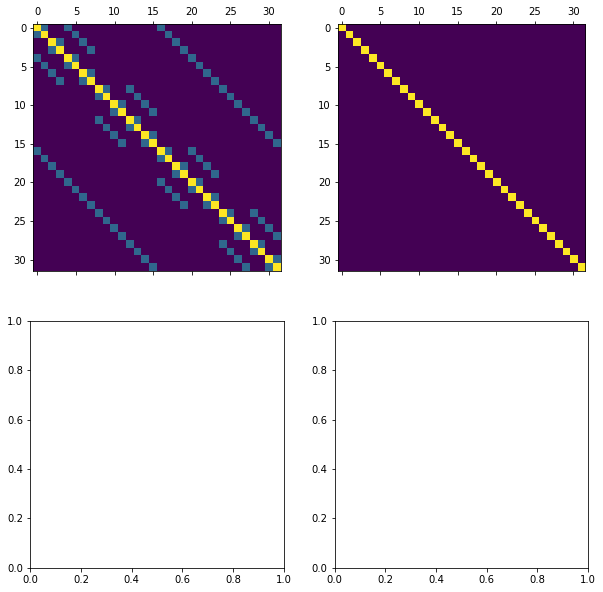

In [197]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0,0].matshow(l_2nn)
ax[0,1].matshow(l_2nn_)
# ax[1,1].matshow(a_tilt_1nn)